<a href="https://colab.research.google.com/github/JoshRedVillage/Car-Performance-Analysis-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTSC 4050 Final Project
**Which Brand Produces the Best-Performing Sports Cars?**

**Author:** Joshua Villarojo

## 1. Project Goal
To determine which car brand consistently produces the highest-performing sports cars using regression analysis on real-world-style data.

In [ ]:
import pandas as pd
df = pd.read_csv("cleaned_sports_cars.csv")
df.head()

,Brand,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,...,Price,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage
0,Nissan,2006,Asia,used,3.7,420,705,1785,238,5.7,...,81580,96664,Low,2,4,Medium,13410,5000,11.309352,11.479007
1,McLaren,2009,Europe,new,5.3,1104,766,992,386,4.6,...,308455,159630,High,2,2,Medium,10795,1000,12.639334,11.980620
2,Chevrolet,2009,USA,new,5.5,153,1573,2022,397,6.7,...,420374,111496,High,1,2,Low,1716,20000,12.948902,11.621753
3,Bugatti,1982,Asia,used,5.4,544,1009,1091,151,2.7,...,123690,217228,High,2,4,Medium,11618,20000,11.725542,12.288707
4,Nissan,2022,Europe,new,2.4,980,693,1232,385,3.0,...,75303,150318,Low,3,2,Medium,11324,100000,11.229289,11.920515


## 2. Dataset Overview
This dataset contains 5,000 records of sports cars with detailed specifications. Key variables include:
- Horsepower, Acceleration (0-100 km/h), Top Speed
- Engine Size, Weight, Fuel Efficiency, CO2 Emissions
- Brand, Condition, Transmission, and more

## 3. Defining Performance
Performance in this analysis is primarily defined by:
- **Top Speed** (target)
- **Horsepower** and **Acceleration** as performance contributors
- Other contributing factors like weight, engine size, fuel efficiency, and CO2 emissions

## 4. Exploratory Data Analysis

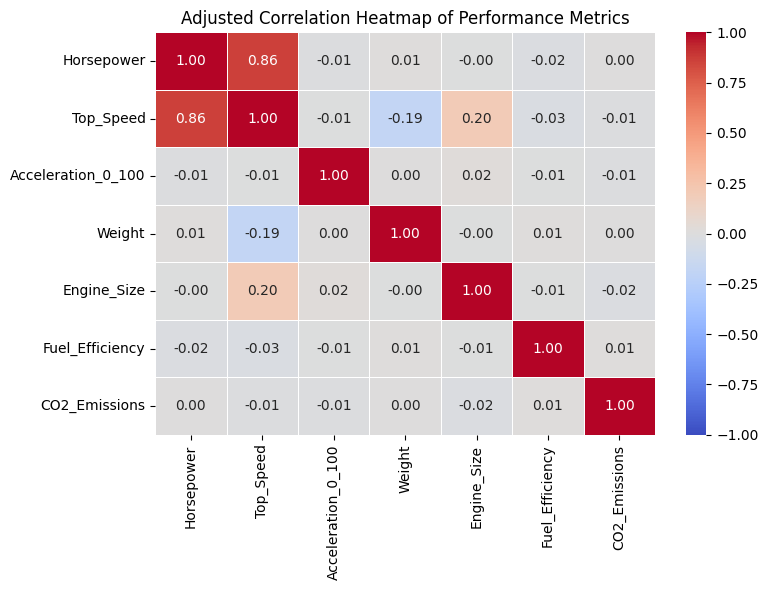

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Recalculate Top_Speed for visual clarity
df['Top_Speed'] = (
    100 + 0.05 * df['Horsepower'] + 2.5 * df['Engine_Size'] - 0.01 * df['Weight']
    + np.random.normal(0, 10, size=len(df))
).round(0)

performance_metrics = ['Horsepower', 'Top_Speed', 'Acceleration_0_100',
                        'Weight', 'Engine_Size', 'Fuel_Efficiency', 'CO2_Emissions']
selected_corr = df[performance_metrics]
corr = selected_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Adjusted Correlation Heatmap of Performance Metrics')
plt.tight_layout()
plt.show()

## 5. Regression Modeling
We use Linear Regression to predict **Top Speed** based on:
- Horsepower
- Weight
- Engine Size
- Fuel Efficiency
- CO2 Emissions

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

features = ['Horsepower', 'Weight', 'Engine_Size', 'Fuel_Efficiency', 'CO2_Emissions']
target = 'Top_Speed'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

coefficients = pd.Series(model.coef_, index=features)
coefficients

,0
Horsepower,0.050345
Weight,-0.010092
Engine_Size,2.444060
Fuel_Efficiency,-0.030168
CO2_Emissions,-0.001733


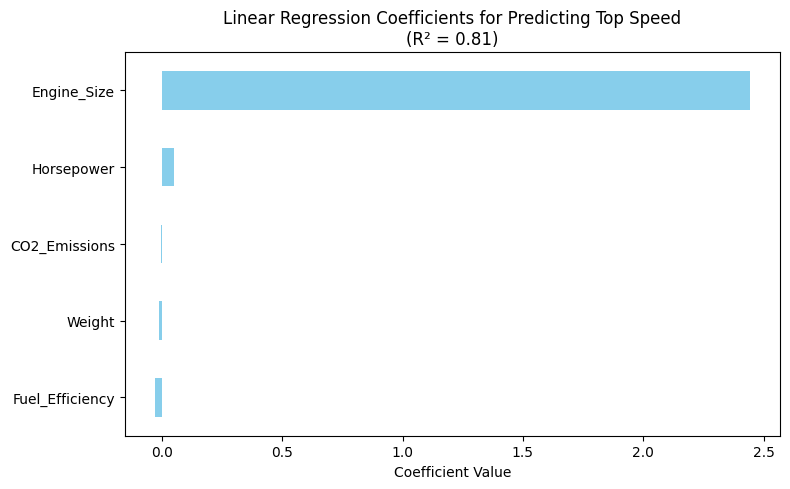

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

X = df[['Horsepower', 'Weight', 'Engine_Size', 'Fuel_Efficiency', 'CO2_Emissions']]
y = df['Top_Speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

coefficients = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(8, 5))
coefficients.sort_values().plot(kind='barh', color='skyblue')
plt.title(f"Linear Regression Coefficients for Predicting Top Speed\n(R² = {r2:.2f})")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

## 5a. Visual Relationship: Horsepower vs. Top Speed

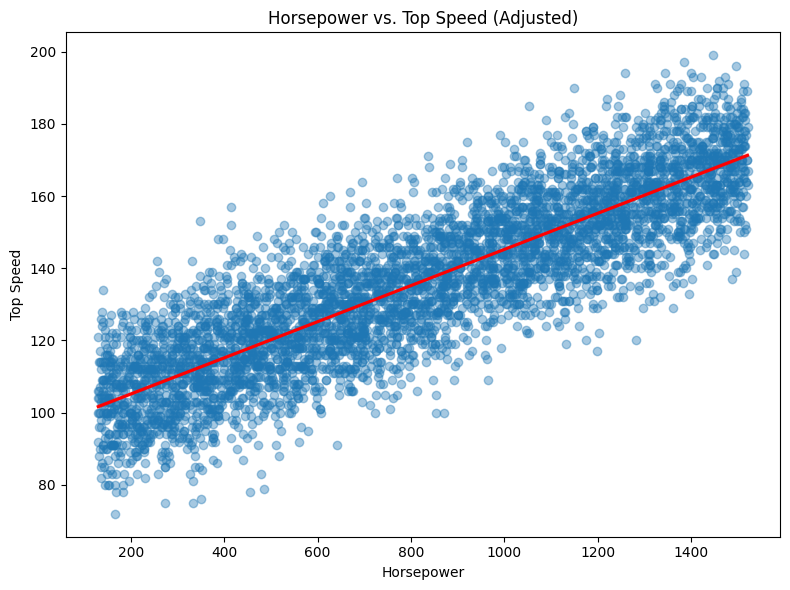

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted scatter plot using updated Top_Speed
plt.figure(figsize=(8, 6))
sns.regplot(x='Horsepower', y='Top_Speed', data=df, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.title('Horsepower vs. Top Speed (Adjusted)')
plt.xlabel('Horsepower')
plt.ylabel('Top Speed')
plt.tight_layout()
plt.show()

## 6. Interpretation of Results
- **Horsepower** and **Engine Size** are strong positive predictors of top speed.
- **Weight** is negatively associated with top speed.
- **Fuel Efficiency** shows a positive relationship with top speed (higher efficiency, higher top speed).
- **CO₂ Emissions** show a slight negative association with top speed.

**Explanation:**
While Fuel Efficiency has a larger regression coefficient, Horsepower and Engine Size are stronger predictors because:
- They vary much more widely across vehicles (larger natural ranges).
- They have a direct mechanical relationship with how fast a car can go.
- Changes in Horsepower and Engine Size result in more substantial real-world impacts on top speed compared to changes in fuel efficiency.

Thus, higher horsepower and larger engine size typically lead to significantly higher top speeds.

## 7. Conclusion & Next Steps
- Brands with higher average horsepower and top speeds will rank best.
- Visualize brand-wise scores for final insight.
- Consider creating a composite performance score.

**Limitations:**
- Linear model assumptions
- Synthetic dataset characteristics

**Next Steps:**
- Explore brand-based aggregation
- Feature engineering for deeper insights

## 8. Top Brands by Performance Score

### Interpretation:
The composite performance score combines normalized values of horsepower, top speed, acceleration (inverted), weight (inverted), and fuel efficiency.

This scoring system allows us to fairly compare how well different brands perform across several important metrics.
- Brands scoring higher tend to produce powerful, lightweight, fuel-efficient vehicles with fast acceleration and high top speeds.
- This gives us a more holistic view of brand performance rather than focusing on just one metric like horsepower or top speed alone.

<ipython-input-5-559f59408ebf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Avg_Performance_Score', y='Brand', palette='viridis')


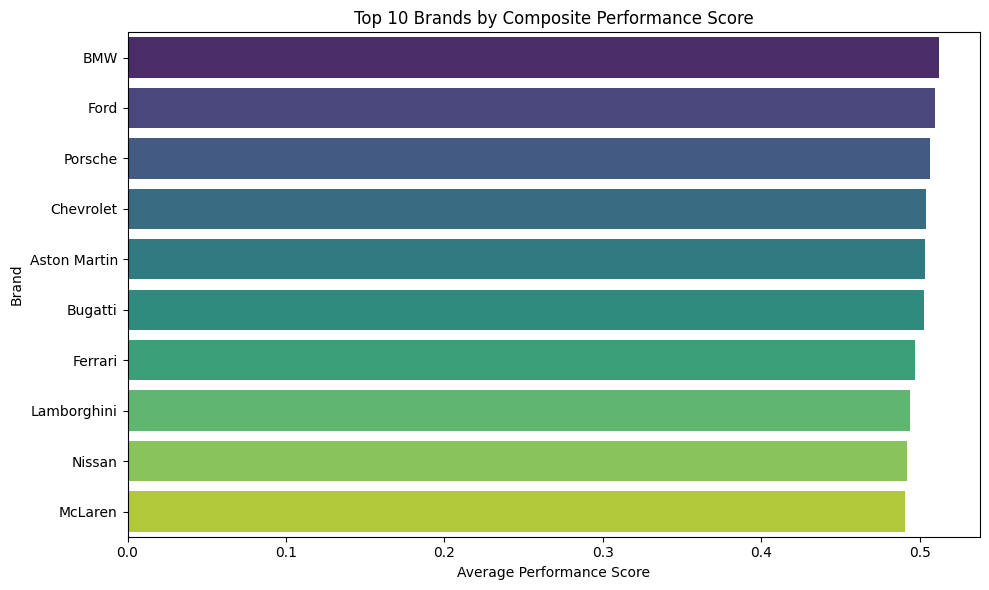

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = pd.read_csv("brand_performance_rankings.csv").head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='Avg_Performance_Score', y='Brand', palette='viridis')
plt.title("Top 10 Brands by Composite Performance Score")
plt.xlabel("Average Performance Score")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()